In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt; 
import pandas as pd
plt.rcdefaults()
%matplotlib inline

import PIL
import glob
import scikitplot as skplt

In [2]:
X_input = []
input_names = ["Band 1", "Band 2", "Band 3", "Band 4", "Band 6", "MRH", "MSH", "MTE", "MVI"]
X_names = np.asarray(input_names)

Y_output = []

In [3]:
folder = "../satyam_rad_sat_mod_npy/"
Sa1_files = glob.glob("../satyam_rad_sat_mod_npy/sa1_npy/*.npy")
Sa1_files

['../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030620.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010216.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030920.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010218.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017030919.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010219.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031318.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017010220.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031319.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012116.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017031320.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012118.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012119.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032716.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017012120.npy',
 '../satyam_rad_sat_mod_npy/sa1_npy/sat.2017032718.npy',
 '../satyam_rad_sat_mod_npy/sa1

In [4]:
len(Sa1_files)

349

In [5]:
for filename in Sa1_files:
    filename = filename.split('/')[-1]
    
    # Satellite 1
    Sa_1_File = folder + "sa1_npy/" + filename;
    Sa1arr = np.load(Sa_1_File).flatten()
    
    
    # Satellite 2
    Sa_2_File = folder + "sa2_npy/" + filename;
    Sa2arr = np.load(Sa_2_File).flatten()
    
    
    # Satellite 3
    Sa_3_File = folder + "sa3_npy/" + filename;
    Sa3arr = np.load(Sa_3_File).flatten()
    
    # Satellite 4
    Sa_4_File = folder + "sa4_npy/" + filename;
    Sa4arr = np.load(Sa_4_File).flatten()
    
    # Satellite 6
    Sa_6_File = folder + "sa6_npy/" + filename;
    Sa6arr = np.load(Sa_6_File).flatten()
    
    
    
    # MRH
    MRH_File = folder+"mrh_npy/" + filename.replace('sat', "mod", 1)
    MRHarr = np.load(MRH_File).flatten()
    
    # MSH
    MSH_File = folder+"msh_npy/" + filename.replace('sat', "mod", 1)
    MSHarr = np.load(MSH_File).flatten()
    
    # MTE
    MTE_File = folder+"tem_npy/" + filename.replace('sat', "mod", 1)
    MTEarr = np.load(MTE_File).flatten()
    
    # MVI
    MVI_File = folder+"vis_npy/" + filename.replace('sat', "mod", 1)
    MVIarr = np.load(MVI_File).flatten()
    

    
    # Radar
    Radar_File = folder + "rad_npy/" + filename.replace('sat', "rad", 1)
    Radararr = np.load(Radar_File).flatten()
    
    
    
    for i in range(len(Sa1arr)):
        x = [];
        x.append(Sa1arr[i])
        x.append(Sa2arr[i])
        x.append(Sa3arr[i])
        x.append(Sa4arr[i])
        x.append(Sa6arr[i])
        
        x.append(MRHarr[i])
        x.append(MSHarr[i])
        x.append(MTEarr[i])
        x.append(MVIarr[i])
        
        Y_output.append(Radararr[i])
        
        X_input.append(x)

In [6]:
X_input = np.array(X_input)
Y_output = np.array(Y_output)

In [7]:
print(X_input.shape)
print(np.std(X_input))
print(np.min(X_input))
print(np.mean(X_input))
print(np.max(X_input))

(65536, 9)
7555.987
0.0011697337
7736.506
26499.057


In [8]:
print(Y_output.shape)
print(np.std(Y_output))
print(np.min(Y_output))
print(np.mean(Y_output))
print(np.max(Y_output))

(65536,)
3.4638414607492107
0
7.6945343017578125
58


In [9]:
Y_output_no_zero = list(filter(lambda a: a != 0, Y_output))
print(np.shape(Y_output_no_zero))
print(np.std(Y_output_no_zero))
print(np.min(Y_output_no_zero))
print(np.mean(Y_output_no_zero))
print(np.max(Y_output_no_zero))

(65535,)
3.4637374768731077
2
7.694651712825208
58


In [10]:
thershold = np.mean(Y_output_no_zero) + 2 * np.std(Y_output_no_zero)
thershold

14.622126666571424

# Fit the model

In [11]:
reg = linear_model.LinearRegression()
reg.fit (X_input, Y_output)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
for feat, coef in zip(X_names, reg.coef_):
    print('{}       {}'.format(feat, coef))

Band 1       -5.406274431152269e-05
Band 2       7.722352165728807e-06
Band 3       -0.0002918759419117123
Band 4       0.000366286956705153
Band 6       -0.0003559330361895263
MRH       0.050472501665353775
MSH       -183.89483642578125
MTE       -0.021410716697573662
MVI       -0.00034139040508307517


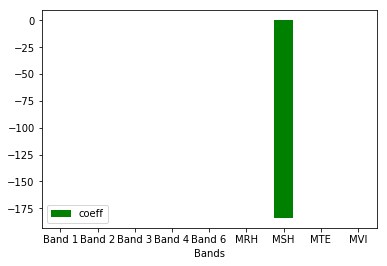

In [13]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg.coef_})
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
plt.show()

# Test Train Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input, Y_output, test_size=0.30, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45875, 9)
(19661, 9)
(45875,)
(19661,)


In [16]:
reg_train = linear_model.LinearRegression()
reg_train.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Save the trained model

In [17]:
import pickle
filename = 'MODEL_70_Multiple_Reg_1x1_nam_sa_npy.sav'
pickle.dump(reg_train, open(filename, 'wb'))

In [18]:
for feat, coef in zip(X_names, reg_train.coef_):
    print('{}       {}'.format(feat, coef))

Band 1       -5.5530173995066434e-05
Band 2       1.19857577374205e-05
Band 3       -0.0003169502888340503
Band 4       0.0003697262145578861
Band 6       -0.0003487414214760065
MRH       0.051223915070295334
MSH       -188.7278289794922
MTE       -0.023013420403003693
MVI       -0.00033803400583565235


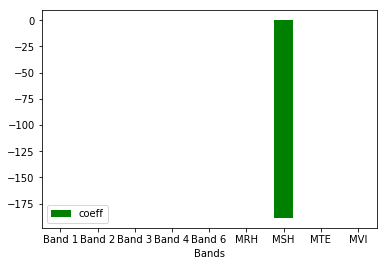

In [19]:
df = pd.DataFrame({'Bands':input_names, 'coeff':reg_train.coef_})
df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
plt.show()

# Evaluation on Trained

In [20]:
predictions_train = reg_train.predict(X_train)

In [21]:
predictions_train.shape

(45875,)

In [22]:
print(r2_score(y_train, predictions_train))

0.1794863996853734


In [23]:
errors_train = abs(predictions_train - y_train)

In [24]:
np.mean(errors_train)

1.1755571088660965

In [25]:
np.max(errors_train)

43.81122016906738

(array([7.55042026e-01, 1.28865188e-01, 4.77758027e-02, 1.70079224e-02,
        1.07533961e-02, 8.47104264e-03, 7.37375732e-03, 6.38620054e-03,
        3.99411855e-03, 2.54570193e-03, 2.89683323e-03, 2.19457063e-03,
        1.51425374e-03, 1.42647091e-03, 1.14117673e-03, 7.90045428e-04,
        5.92534071e-04, 6.14479777e-04, 6.14479777e-04]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

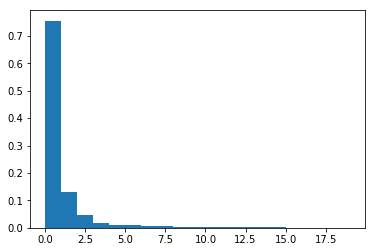

In [26]:
plt.hist(errors_train, bins=range(0, 20, 1), density=1)

### Confusion Matrix

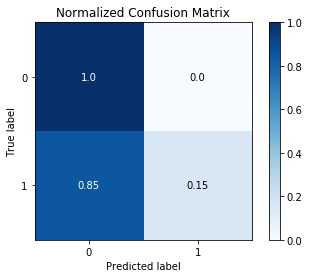

In [27]:
y_train_copy = np.copy(y_train)
y_train_copy[y_train_copy < thershold] = 0
y_train_copy[y_train_copy >= thershold] = 1

predictions_train_copy = np.copy(predictions_train)
predictions_train_copy[predictions_train_copy < thershold] = 0
predictions_train_copy[predictions_train_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_train_copy, predictions_train_copy, normalize=True)
plt.show()

# Evaluation on Test

In [28]:
predictions_test = reg_train.predict(X_test)
predictions_test.shape

(19661,)

In [29]:
print(r2_score(y_test, predictions_test))

0.16311397990443166


In [30]:
y_test.shape

(19661,)

In [31]:
errors_test = abs(predictions_test - y_test)

In [32]:
print(errors_test.shape)
print(np.std(errors_test))
print(np.min(errors_test))
print(np.mean(errors_test))
print(np.max(errors_test))

(19661,)
2.938606305503825
3.814697265625e-06
1.1880356999296338
46.626413345336914


(array([1.911e+03, 1.866e+03, 1.670e+03, 1.578e+03, 1.429e+03, 1.190e+03,
        1.017e+03, 7.650e+02, 6.970e+02, 5.160e+02, 4.910e+02, 3.710e+02,
        3.470e+02, 3.310e+02, 2.790e+02, 2.340e+02, 2.630e+02, 2.240e+02,
        2.420e+02, 2.210e+02, 2.190e+02, 1.930e+02, 1.880e+02, 1.460e+02,
        1.360e+02, 1.350e+02, 1.210e+02, 1.030e+02, 9.700e+01, 1.030e+02,
        1.050e+02, 8.600e+01, 8.500e+01, 5.200e+01, 8.100e+01, 7.800e+01,
        8.200e+01, 8.500e+01, 6.200e+01, 8.000e+01, 6.900e+01, 7.300e+01,
        4.700e+01, 5.400e+01, 3.700e+01, 3.300e+01, 3.400e+01, 3.400e+01,
        3.000e+01, 2.900e+01, 2.000e+01, 2.000e+01, 1.900e+01, 1.600e+01,
        2.100e+01, 1.800e+01, 2.400e+01, 2.100e+01, 1.500e+01, 1.100e+01,
        1.300e+01, 1.600e+01, 9.000e+00, 1.800e+01, 1.200e+01, 1.200e+01,
        1.100e+01, 1.200e+01, 9.000e+00, 2.000e+01, 8.000e+00, 1.300e+01,
        1.900e+01, 1.300e+01, 1.600e+01, 2.200e+01, 7.000e+00, 6.000e+00,
        1.300e+01, 9.000e+00, 8.000e+0

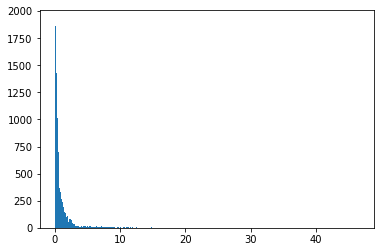

In [33]:
plt.hist(errors_test, bins='auto')

(array([1.9308e+04, 2.3200e+02, 7.8000e+01, 3.8000e+01, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <a list of 12 Patch objects>)

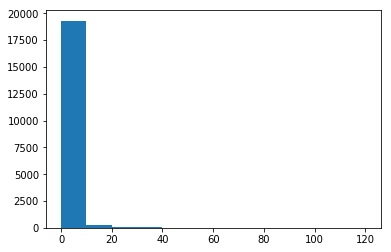

In [34]:
plt.hist(errors_test, bins=range(0, 130, 10))

In [35]:
np.sum(errors_test)

23357.96989631653

### Confusion Matrix

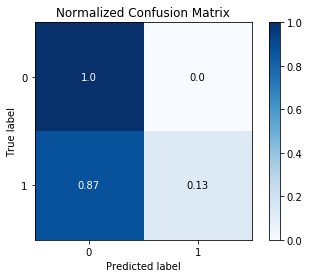

In [36]:
y_test_copy = np.copy(y_test)
y_test_copy[y_test_copy < thershold] = 0
y_test_copy[y_test_copy >= thershold] = 1

predictions_test_copy = np.copy(predictions_test)
predictions_test_copy[predictions_test_copy < thershold] = 0
predictions_test_copy[predictions_test_copy >= thershold] = 1

skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
plt.show()

# k-FOLD  Train Test (k = 10)

In [37]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
kf.get_n_splits(X_input)
print(kf) 

KFold(n_splits=10, random_state=42, shuffle=True)


(58982, 9)
(6554, 9)
(58982,)
(6554,)


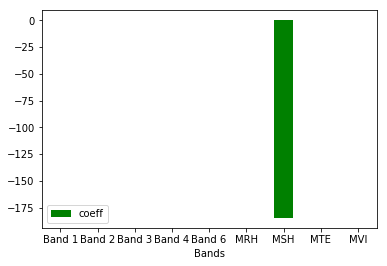



r2_score: 
0.16153048332967856


Sum : 7813.874444961548
Distribution


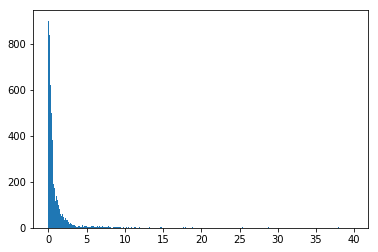

Confusion Matrix


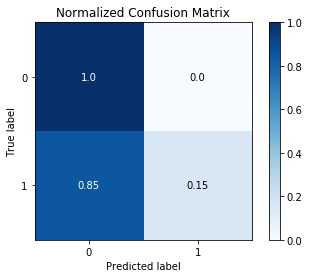



(58982, 9)
(6554, 9)
(58982,)
(6554,)


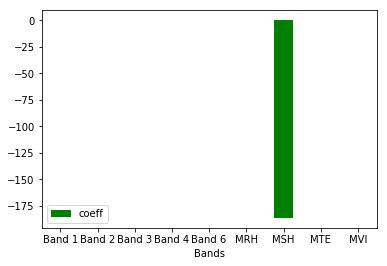



r2_score: 
0.15233187930107894


Sum : 7569.220850944519
Distribution


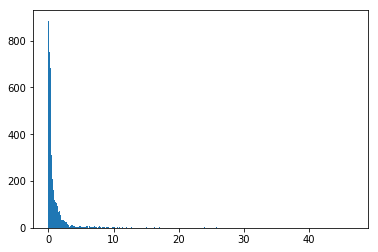

Confusion Matrix


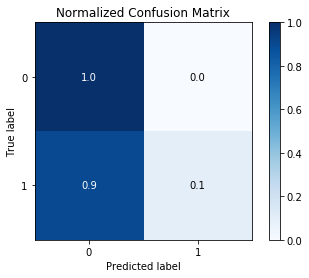



(58982, 9)
(6554, 9)
(58982,)
(6554,)


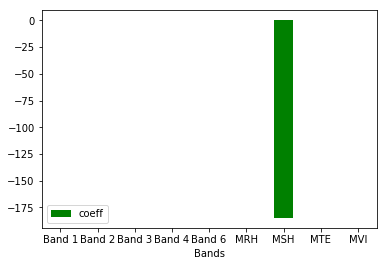



r2_score: 
0.17334735464782347


Sum : 7866.479001998901
Distribution


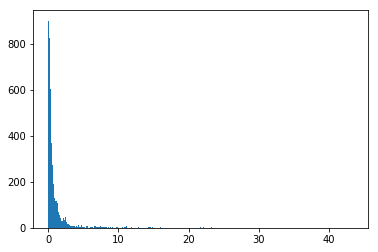

Confusion Matrix


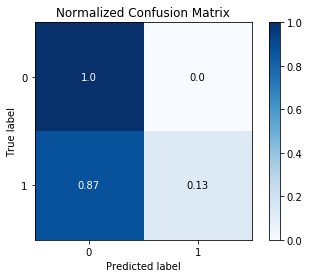



(58982, 9)
(6554, 9)
(58982,)
(6554,)


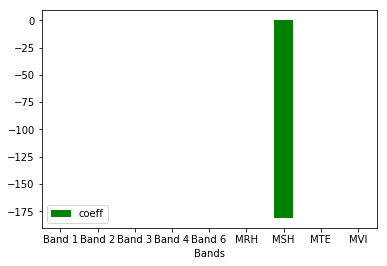



r2_score: 
0.19760737871962963


Sum : 7809.336296081543
Distribution


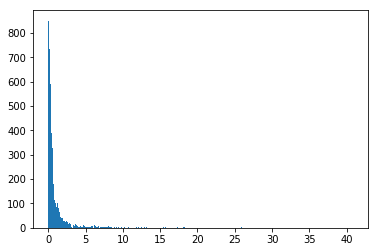

Confusion Matrix


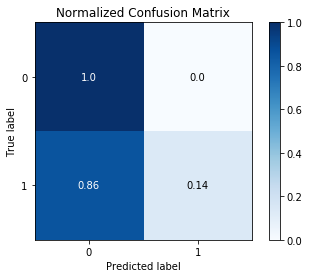



(58982, 9)
(6554, 9)
(58982,)
(6554,)


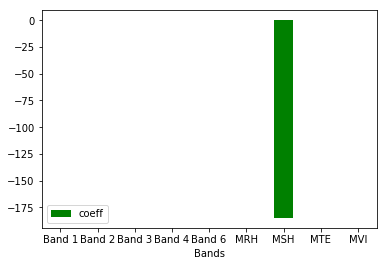



r2_score: 
0.14541091638108428


Sum : 7719.88258934021
Distribution


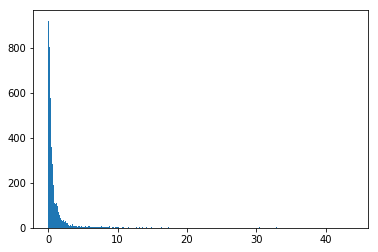

Confusion Matrix


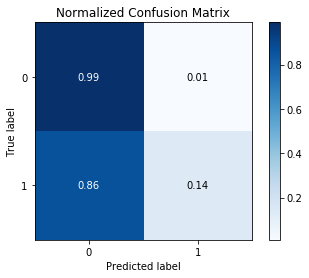



(58982, 9)
(6554, 9)
(58982,)
(6554,)


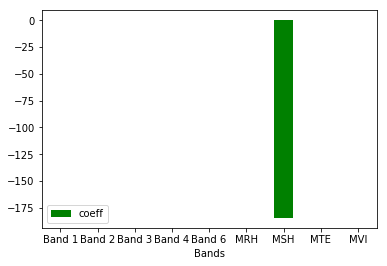



r2_score: 
0.18703771034386318


Sum : 7825.038775444031
Distribution


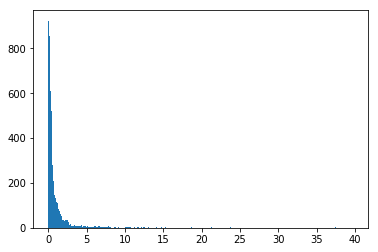

Confusion Matrix


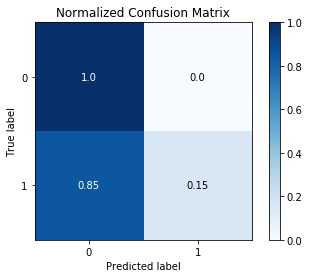



(58983, 9)
(6553, 9)
(58983,)
(6553,)


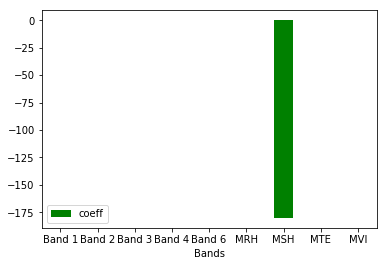



r2_score: 
0.170732627297147


Sum : 7827.78470993042
Distribution


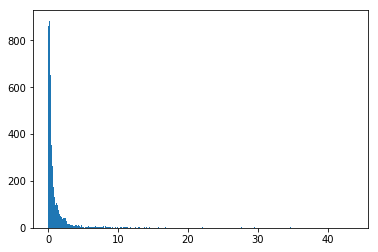

Confusion Matrix


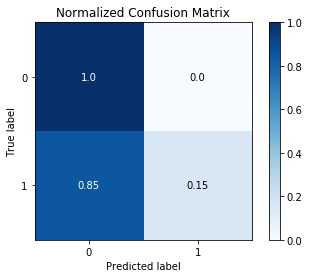



(58983, 9)
(6553, 9)
(58983,)
(6553,)


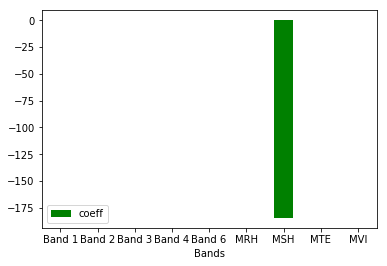



r2_score: 
0.1808501807852687


Sum : 7405.33953666687
Distribution


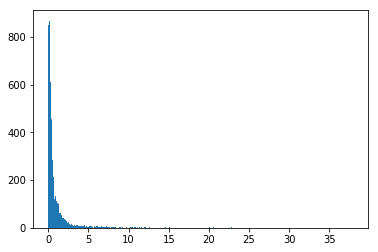

Confusion Matrix


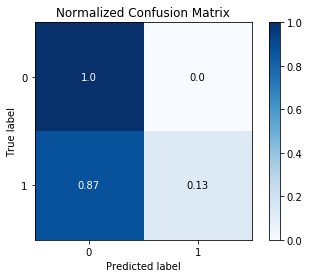



(58983, 9)
(6553, 9)
(58983,)
(6553,)


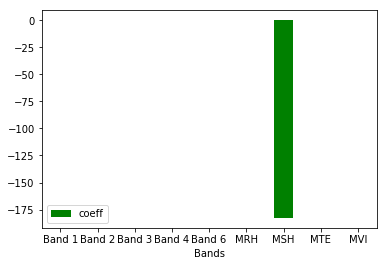



r2_score: 
0.17892371479950664


Sum : 7451.035137176514
Distribution


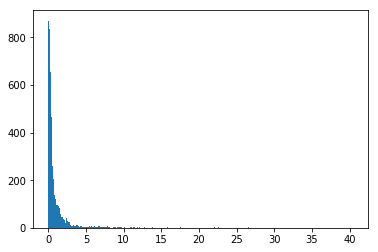

Confusion Matrix


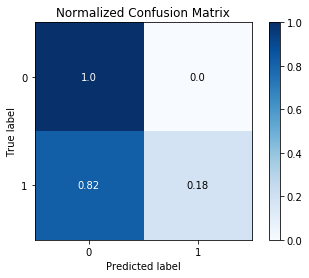



(58983, 9)
(6553, 9)
(58983,)
(6553,)


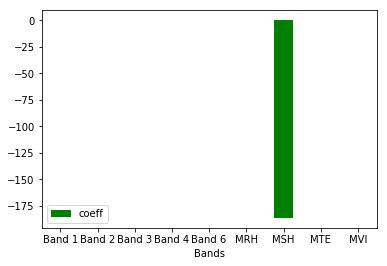



r2_score: 
0.18921996710369382


Sum : 7565.217452049255
Distribution


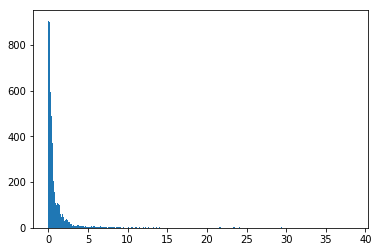

Confusion Matrix


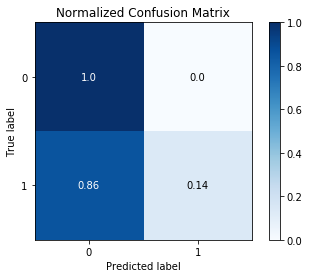

In [38]:
for train_index, test_index in kf.split(X_input):
    print("=====================================")
    X_train, X_test = X_input[train_index], X_input[test_index]
    y_train, y_test = Y_output[train_index], Y_output[test_index]
    
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    reg_train = linear_model.LinearRegression()
    reg_train.fit(X_train, y_train)
    
    
    df = pd.DataFrame({'Bands':input_names, 'coeff':reg_train.coef_})
    df.plot.bar(x='Bands', y='coeff', rot=0, color=('g'))
    plt.show()
    
    predictions_test = reg_train.predict(X_test)
    
    print("\n")
    print("r2_score: ")
    print(r2_score(y_test, predictions_test))
    print("\n")
    
    errors_test = abs(predictions_test - y_test)
    print("Sum :", np.sum(errors_test))
    print("Distribution")
    plt.hist(errors_test, bins='auto')
    plt.show()
    
    y_test_copy = np.copy(y_test)
    y_test_copy[y_test_copy < thershold] = 0
    y_test_copy[y_test_copy >= thershold] = 1

    predictions_test_copy = np.copy(predictions_test)
    predictions_test_copy[predictions_test_copy < thershold] = 0
    predictions_test_copy[predictions_test_copy >= thershold] = 1
    
    print("Confusion Matrix")
    skplt.metrics.plot_confusion_matrix(y_test_copy, predictions_test_copy, normalize=True)
    plt.show()

    print("\n")